In [1]:
import graphviz 
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

import utils

from utils import local_data
from utils import window
from utils import Scale, give_error

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise.pkl')

In [3]:
df.head()

,vtec,vtec_dt,vtec_dt2,gvtec1,gvtec1_dt,gvtec2,gvtec2_dt,s4
2013-12-01 03:30:00,33.624428,-0.428246,-0.020502,-3.216613,0.002355,1.826065,1.991653,0.163334
2013-12-01 03:40:00,33.205025,-0.546589,-0.118343,-3.122300,0.130198,4.588494,2.530373,0.165397
2013-12-01 03:50:00,32.539631,-0.772594,-0.226005,-2.810556,0.280756,7.786990,2.862830,0.168683
2013-12-01 04:00:00,31.469337,-1.082859,-0.310265,-2.320938,0.399753,10.972091,2.894375,0.173552
2013-12-01 04:10:00,29.995466,-1.429647,-0.346788,-1.764129,0.443303,13.734955,2.621609,0.178917


# Árvore de Regressão
## Completa

In [4]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00246817 -0.00188443 -0.00207536 -0.00219504 -0.00138016 -0.00197587
 -0.00243931 -0.00155319 -0.00208149 -0.00210553] 

O erro quadrático médio foi: 0.001738
O erro quadrático total foi: 2.501357
O maior erro por previsão foi: 0.366354
O erro relativo foi: 8.447851%
O número de verdadeiros negativos foi: 3086
O número de verdadeiros positivos foi: 236
O número de falsos negativos foi: 141
O número de falsos positivos foi: 137
O POD foi: 0.625995
O FAR foi: 0.367292
A ACC foi: 0.922778
O kappa foi: 0.036069

Error for the time series sample:
O erro quadrático médio foi: 0.008545
O erro quadrático total foi: 2.401641
O maior erro por previsão foi: 0.598193
O erro relativo foi: 18.197604%
O número de verdadeiros negativos foi: 524
O número de verdadeiros positivos foi: 46
O número de falsos negativos foi: 38
O número de falsos positivos foi: 67
O POD foi: 0.547619
O FAR foi: 0.592920
A ACC foi: 0.844444
O kappa foi: 0.050467


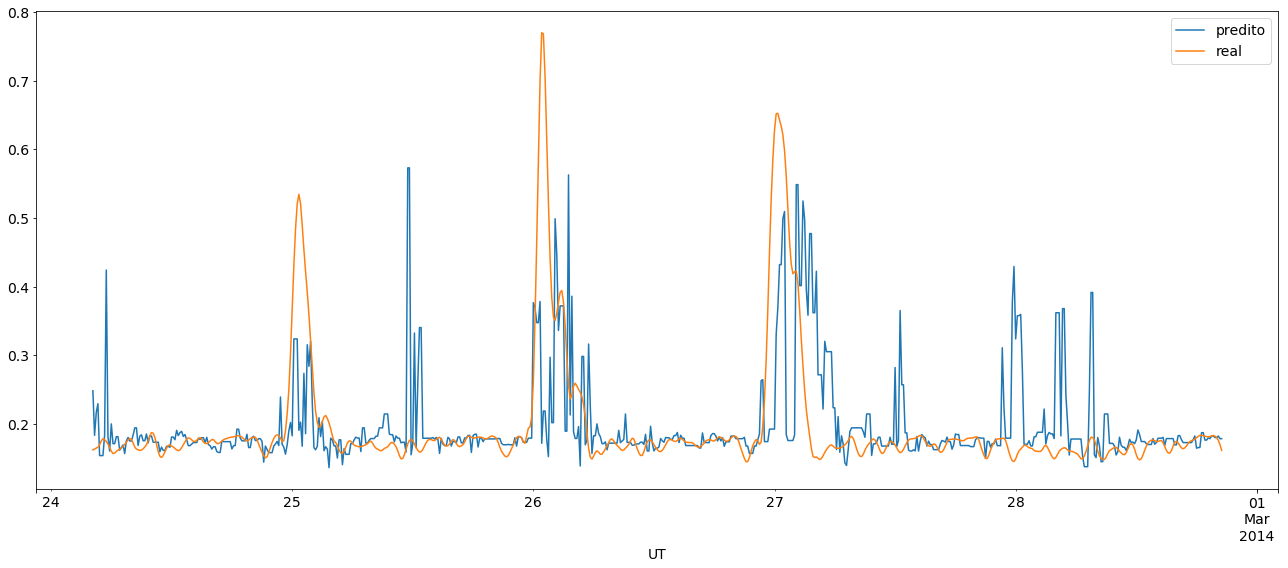

In [5]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predito'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predito'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(18, 8));
plt.xlabel('UT')
plt.tight_layout()
plt.savefig('./images/regression_cart.eps', format='eps', dpi=1000)

## Sem vtec

In [6]:
instances_set = ['vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00204886 -0.00308975 -0.00274841 -0.00256629 -0.003275   -0.00250788
 -0.00281301 -0.0020987  -0.00288372 -0.00254811] 

O erro quadrático médio foi: 0.002201
O erro quadrático total foi: 2.814701
O maior erro por previsão foi: 0.369949
O erro relativo foi: 10.628781%
O número de verdadeiros negativos foi: 3015
O número de verdadeiros positivos foi: 184
O número de falsos negativos foi: 193
O número de falsos positivos foi: 208
O POD foi: 0.488064
O FAR foi: 0.530612
A ACC foi: 0.888611
O kappa foi: 0.047852

Error for the time series sample:
O erro quadrático médio foi: 0.008337
O erro quadrático total foi: 2.372294
O maior erro por previsão foi: 0.626911
O erro relativo foi: 20.242914%
O número de verdadeiros negativos foi: 515
O número de verdadeiros positivos foi: 49
O número de falsos negativos foi: 35
O número de falsos positivos foi: 76
O POD foi: 0.583333
O FAR foi: 0.608000
A ACC foi: 0.835556
O kappa foi: 0.047734


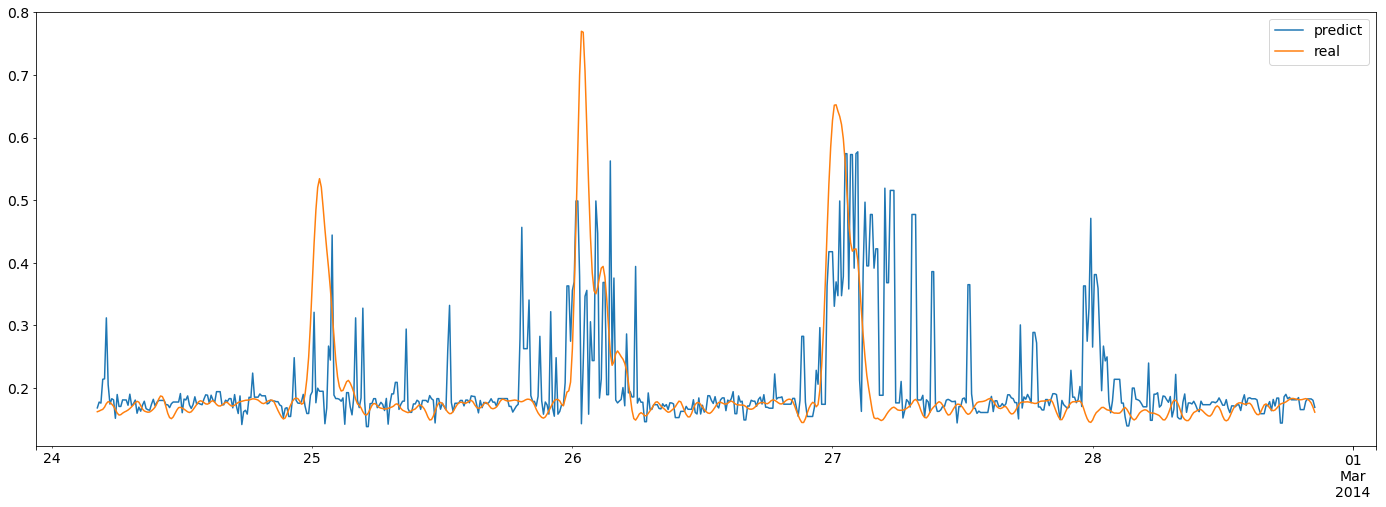

In [7]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal primeira do VTEC

In [8]:
instances_set = ['vtec', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00253899 -0.00205334 -0.00212901 -0.00200671 -0.0016961  -0.00184505
 -0.00244134 -0.00190956 -0.00190636 -0.00202823] 

O erro quadrático médio foi: 0.001756
O erro quadrático total foi: 2.513936
O maior erro por previsão foi: 0.364188
O erro relativo foi: 9.041467%
O número de verdadeiros negativos foi: 3069
O número de verdadeiros positivos foi: 225
O número de falsos negativos foi: 152
O número de falsos positivos foi: 154
O POD foi: 0.596817
O FAR foi: 0.406332
A ACC foi: 0.915000
O kappa foi: 0.038668

Error for the time series sample:
O erro quadrático médio foi: 0.006785
O erro quadrático total foi: 2.140084
O maior erro por previsão foi: 0.438307
O erro relativo foi: 16.155020%
O número de verdadeiros negativos foi: 550
O número de verdadeiros positivos foi: 50
O número de falsos negativos foi: 34
O número de falsos positivos foi: 41
O POD foi: 0.595238
O FAR foi: 0.450549
A ACC foi: 0.888889
O kappa foi: 0.045542


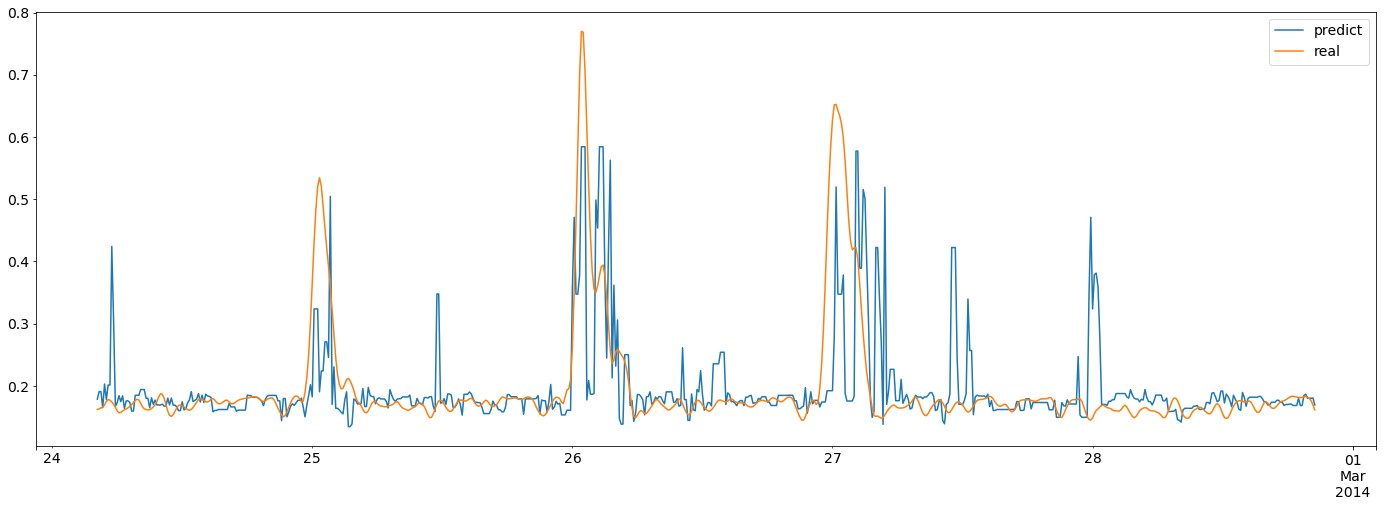

In [9]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal segunda do VTEC

In [10]:
instances_set = ['vtec', 'vtec_dt', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00260005 -0.002082   -0.00198121 -0.00265368 -0.00186069 -0.00210955
 -0.00184553 -0.00180711 -0.00169555 -0.00199008] 

O erro quadrático médio foi: 0.001936
O erro quadrático total foi: 2.640150
O maior erro por previsão foi: 0.397983
O erro relativo foi: 8.721820%
O número de verdadeiros negativos foi: 3073
O número de verdadeiros positivos foi: 233
O número de falsos negativos foi: 144
O número de falsos positivos foi: 150
O POD foi: 0.618037
O FAR foi: 0.391645
A ACC foi: 0.918333
O kappa foi: 0.036841

Error for the time series sample:
O erro quadrático médio foi: 0.006872
O erro quadrático total foi: 2.153710
O maior erro por previsão foi: 0.514469
O erro relativo foi: 16.430129%
O número de verdadeiros negativos foi: 546
O número de verdadeiros positivos foi: 56
O número de falsos negativos foi: 28
O número de falsos positivos foi: 45
O POD foi: 0.666667
O FAR foi: 0.445545
A ACC foi: 0.891852
O kappa foi: 0.039085


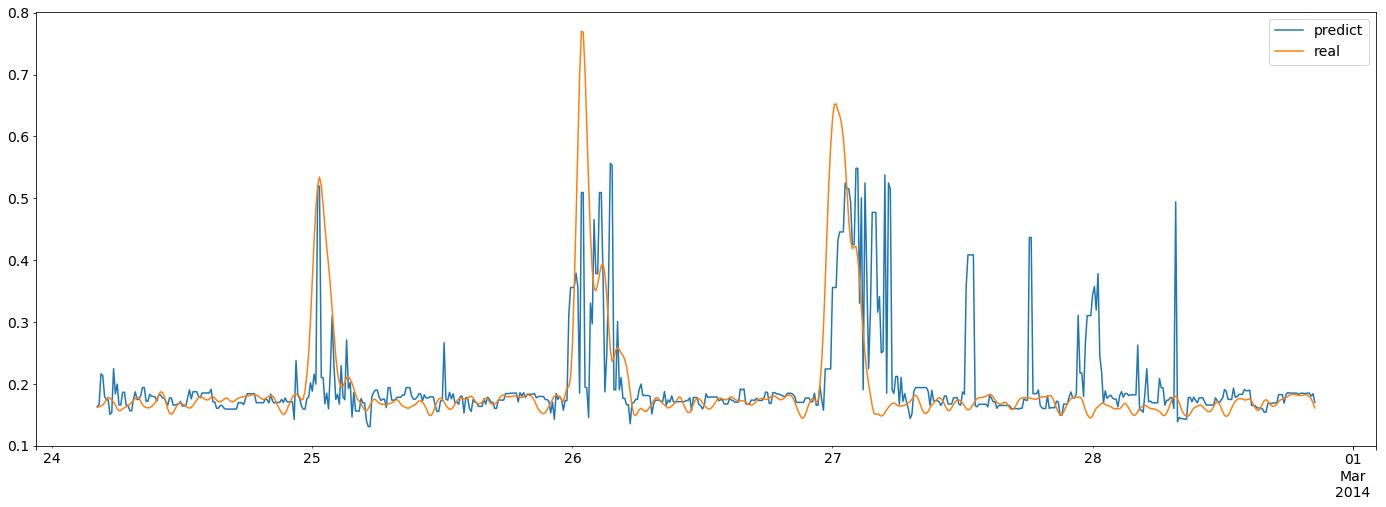

In [11]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Pirassununga

In [12]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.0022051  -0.00198682 -0.00244469 -0.00263348 -0.00211998 -0.00242715
 -0.0019198  -0.00223377 -0.00209209 -0.00225459] 

O erro quadrático médio foi: 0.002032
O erro quadrático total foi: 2.704360
O maior erro por previsão foi: 0.414523
O erro relativo foi: 9.292508%
O número de verdadeiros negativos foi: 3063
O número de verdadeiros positivos foi: 206
O número de falsos negativos foi: 171
O número de falsos positivos foi: 160
O POD foi: 0.546419
O FAR foi: 0.437158
A ACC foi: 0.908056
O kappa foi: 0.042958

Error for the time series sample:
O erro quadrático médio foi: 0.008601
O erro quadrático total foi: 2.409513
O maior erro por previsão foi: 0.531597
O erro relativo foi: 17.705984%
O número de verdadeiros negativos foi: 543
O número de verdadeiros positivos foi: 40
O número de falsos negativos foi: 44
O número de falsos positivos foi: 48
O POD foi: 0.476190
O FAR foi: 0.545455
A ACC foi: 0.863704
O kappa foi: 0.056652


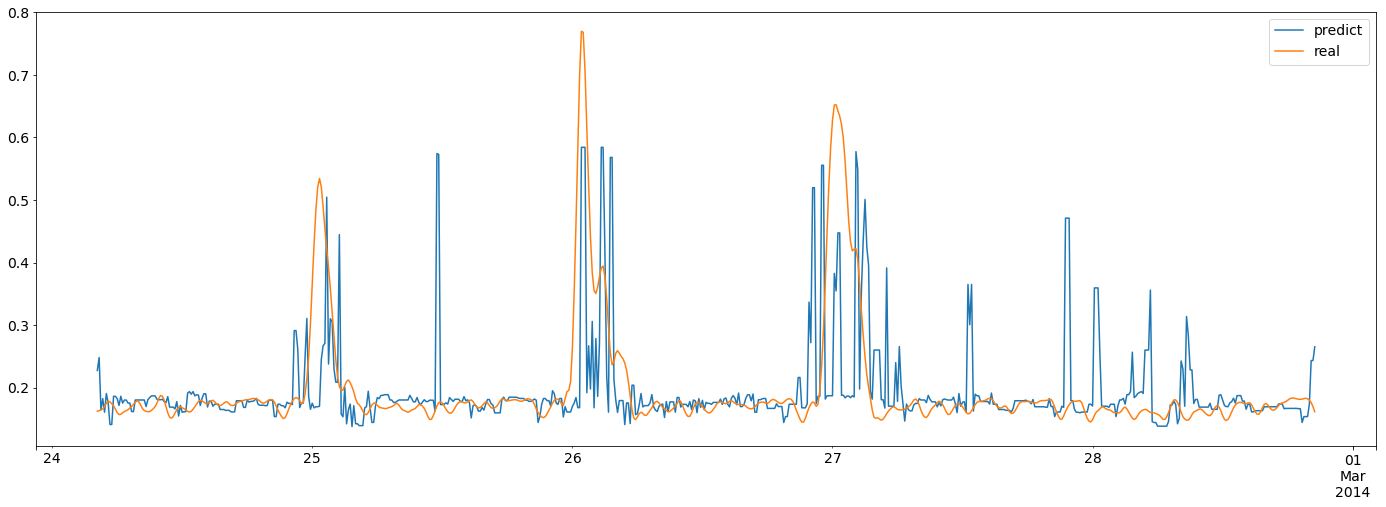

In [13]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Pirassununga

In [14]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec2', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00201844 -0.00177536 -0.00189387 -0.00245638 -0.00228813 -0.00199413
 -0.00227073 -0.00155696 -0.00235386 -0.00174681] 

O erro quadrático médio foi: 0.001893
O erro quadrático total foi: 2.610182
O maior erro por previsão foi: 0.401624
O erro relativo foi: 8.852487%
O número de verdadeiros negativos foi: 3079
O número de verdadeiros positivos foi: 238
O número de falsos negativos foi: 139
O número de falsos positivos foi: 144
O POD foi: 0.631300
O FAR foi: 0.376963
A ACC foi: 0.921389
O kappa foi: 0.035668

Error for the time series sample:
O erro quadrático médio foi: 0.007360
O erro quadrático total foi: 2.228943
O maior erro por previsão foi: 0.605921
O erro relativo foi: 15.359901%
O número de verdadeiros negativos foi: 538
O número de verdadeiros positivos foi: 44
O número de falsos negativos foi: 40
O número de falsos positivos foi: 53
O POD foi: 0.523810
O FAR foi: 0.546392
A ACC foi: 0.862222
O kappa foi: 0.052350


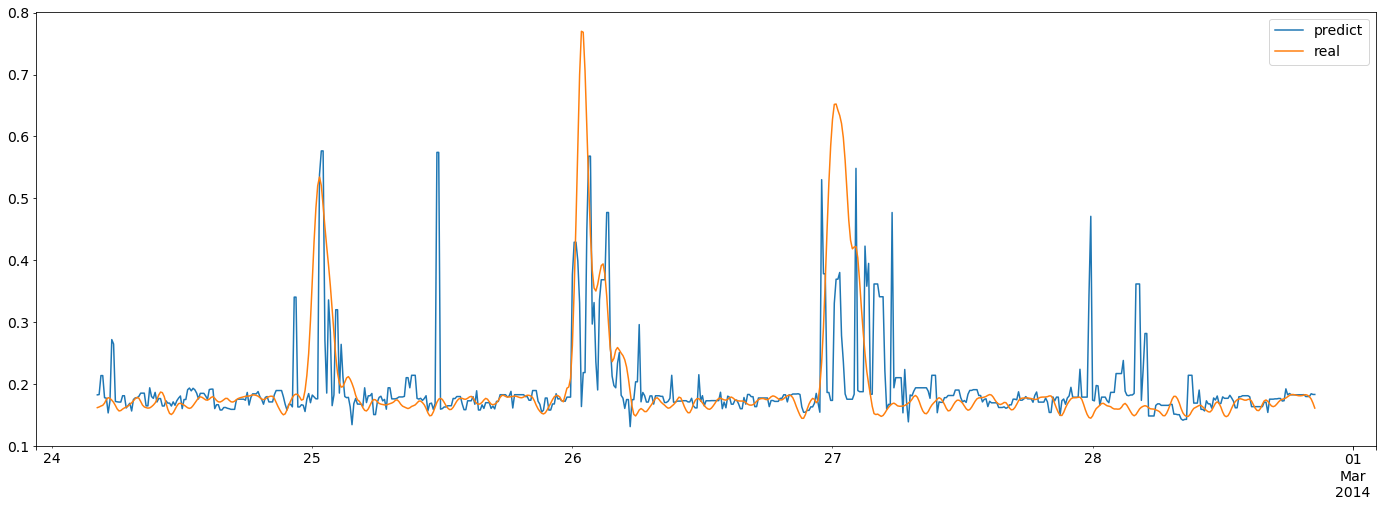

In [15]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem gradiente do VTEC em relação à Brasília

In [16]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2_dt']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00239514 -0.00190955 -0.00199757 -0.00302952 -0.00219698 -0.00321477
 -0.00279118 -0.00194725 -0.00278112 -0.00264004] 

O erro quadrático médio foi: 0.002366
O erro quadrático total foi: 2.918633
O maior erro por previsão foi: 0.367448
O erro relativo foi: 10.272545%
O número de verdadeiros negativos foi: 3018
O número de verdadeiros positivos foi: 223
O número de falsos negativos foi: 154
O número de falsos positivos foi: 205
O POD foi: 0.591512
O FAR foi: 0.478972
A ACC foi: 0.900278
O kappa foi: 0.039389

Error for the time series sample:
O erro quadrático médio foi: 0.009329
O erro quadrático total foi: 2.509455
O maior erro por previsão foi: 0.612082
O erro relativo foi: 19.233106%
O número de verdadeiros negativos foi: 521
O número de verdadeiros positivos foi: 47
O número de falsos negativos foi: 37
O número de falsos positivos foi: 70
O POD foi: 0.559524
O FAR foi: 0.598291
A ACC foi: 0.841481
O kappa foi: 0.049530


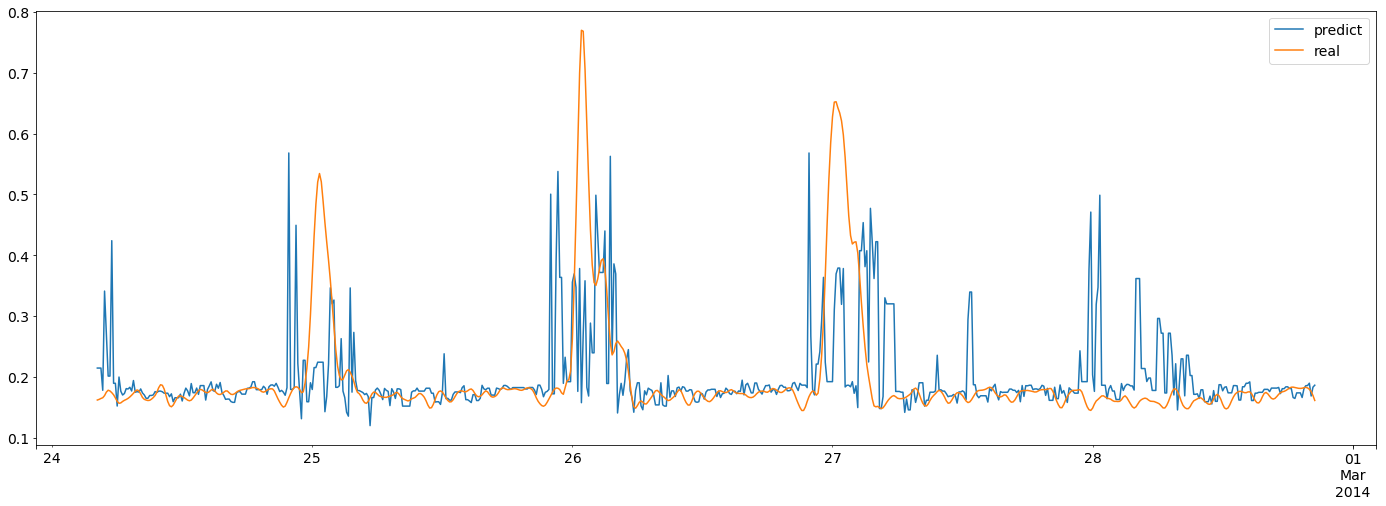

In [17]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));

## Sem derivada temporal do gradiente do VTEC em relação à Brasília

In [18]:
instances_set = ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2']
scaler = StandardScaler()
scaler.fit(X=df[instances_set].values) 
X = scaler.transform(X=df[instances_set].values)
y = df['s4'].values

X_train, X_test, y_train, y_test = train_test_split(X[0:12000], y[0:12000], test_size=0.30, random_state=42)
index = df.index.values[12000:12772]

The scores for the k-fold crossvalidation was:
[-0.00221229 -0.00139995 -0.00228928 -0.00202025 -0.00179706 -0.00224857
 -0.00192745 -0.00197183 -0.00175254 -0.00193677] 

O erro quadrático médio foi: 0.001987
O erro quadrático total foi: 2.674744
O maior erro por previsão foi: 0.393690
O erro relativo foi: 8.933221%
O número de verdadeiros negativos foi: 3070
O número de verdadeiros positivos foi: 223
O número de falsos negativos foi: 154
O número de falsos positivos foi: 153
O POD foi: 0.591512
O FAR foi: 0.406915
A ACC foi: 0.914722
O kappa foi: 0.039113

Error for the time series sample:
O erro quadrático médio foi: 0.008491
O erro quadrático total foi: 2.393981
O maior erro por previsão foi: 0.598193
O erro relativo foi: 17.210363%
O número de verdadeiros negativos foi: 539
O número de verdadeiros positivos foi: 55
O número de falsos negativos foi: 29
O número de falsos positivos foi: 52
O POD foi: 0.654762
O FAR foi: 0.485981
A ACC foi: 0.880000
O kappa foi: 0.040584


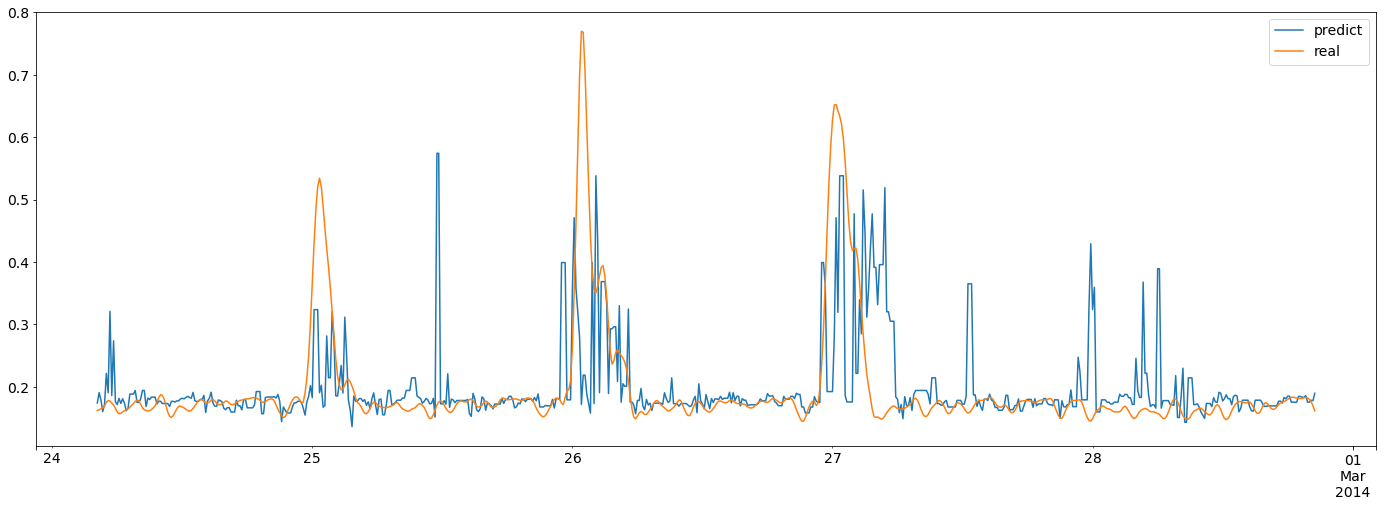

In [19]:
# generate model, use k-fold crossvalidation and print scores
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('The scores for the k-fold crossvalidation was:')
print(scores, '\n')

# generate final model, and avaliate a test set
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
give_error(y_test, y_predict);
print()

# use the final model to avaliate the error in a sample of the time series
df_aux = pd.DataFrame(index=index)
df_aux['predict'] = model.predict(X[12000:12772])
df_aux['real'] = y[12000:12772]

print('Error for the time series sample:')
give_error(df_aux['real'].values, df_aux['predict'].values);

# plot the time series predict against the real values
df_aux.plot(figsize=(24, 8));